## Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import sys

In [3]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
# print 생략 없이 출력
np.set_printoptions(threshold=sys.maxsize)

## Load dataset

In [4]:
train = pd.read_csv("/data/ephemeral/home/level2_KLUE/dataset/train/train.csv",index_col=0)
test = pd.read_csv("/data/ephemeral/home/level2_KLUE/dataset/test/test_data.csv",index_col=0)

display(train.head())
print()
display(test.head())

,sentence,subject_entity,object_entity,label,source
id,,,,,
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


,sentence,subject_entity,object_entity,label,source
id,,,,,
0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree
1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia
2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia
3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia
4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree


In [5]:
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32470 entries, 0 to 32469
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentence        32470 non-null  object
 1   subject_entity  32470 non-null  object
 2   object_entity   32470 non-null  object
 3   label           32470 non-null  object
 4   source          32470 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB
None

<class 'pandas.core.frame.DataFrame'>
Index: 7765 entries, 0 to 7764
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentence        7765 non-null   object
 1   subject_entity  7765 non-null   object
 2   object_entity   7765 non-null   object
 3   label           7765 non-null   int64 
 4   source          7765 non-null   object
dtypes: int64(1), object(4)
memory usage: 364.0+ KB
None


## Data Preprocessing

In [6]:
def preprocessing(entity):
    components = entity[1:-1].split(',')
    
    word  = components[0].split(":")[1]
    if len(components) > 4:
        word = word + "".join(components[1:-3])
    start_idx = components[-3].split(":")[1]
    end_idx = components[-2].split(":")[1]
    type = components[-1].split(":")[1]
    if len(components) < 4:
        print(components)
    return word.strip()[1:-1], int(start_idx), int(end_idx), type.strip()[1:-1]

In [7]:
train['subject_word'], train['subject_start_idx'], train['subject_end_idx'], train['subject_type'] = zip(*train['subject_entity'].apply(preprocessing))
train['object_word'], train['object_start_idx'], train['object_end_idx'], train['object_type'] = zip(*train['object_entity'].apply(preprocessing))
test['subject_word'], test['subject_start_idx'], test['subject_end_idx'], test['subject_type'] = zip(*test['subject_entity'].apply(preprocessing))
test['object_word'], test['object_start_idx'], test['object_end_idx'], test['object_type'] = zip(*test['object_entity'].apply(preprocessing))

display(train.head())
display(test.head())

,sentence,subject_entity,object_entity,label,source,subject_word,subject_start_idx,subject_end_idx,subject_type,object_word,object_start_idx,object_end_idx,object_type
id,,,,,,,,,,,,,
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,비틀즈,24,26,ORG,조지 해리슨,13,18,PER
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,민주평화당,19,23,ORG,대안신당,14,17,ORG
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,광주FC,21,24,ORG,한국프로축구연맹,34,41,ORG
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,아성다이소,13,17,ORG,박정부,22,24,PER
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,요미우리 자이언츠,22,30,ORG,1967,0,3,DAT


,sentence,subject_entity,object_entity,label,source,subject_word,subject_start_idx,subject_end_idx,subject_type,object_word,object_start_idx,object_end_idx,object_type
id,,,,,,,,,,,,,
0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, ...","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_i...",100,wikitree,MBC,7,9,ORG,탐사기획 스트레이트,12,21,ORG
1,사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이...,"{'word': '프린세스 프링', 'start_idx': 7, 'end_idx':...","{'word': '공주', 'start_idx': 84, 'end_idx': 85,...",100,wikipedia,프린세스 프링,7,13,PER,공주,84,85,POH
2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으...","{'word': '경찰', 'start_idx': 121, 'end_idx': 12...","{'word': '1995년', 'start_idx': 31, 'end_idx': ...",100,wikipedia,경찰,121,122,ORG,1995년,31,35,DAT
3,정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하...,"{'word': '세조', 'start_idx': 78, 'end_idx': 79,...","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, ...",100,wikipedia,세조,78,79,PER,정창손,0,2,PER
4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지...","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, ...","{'word': '권영진', 'start_idx': 16, 'end_idx': 18...",100,wikitree,민주당,3,5,ORG,권영진,16,18,PER


In [8]:
def label_to_num(file_path:str="/data/ephemeral/home/level2_KLUE/code/dict_label_to_num.pkl") -> dict:
    """
    {'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headquarters': 7, 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 'per:place_of_residence': 11, 'per:alternate_names': 12, 'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16, 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, 'org:member_of': 20, 'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24, 'per:date_of_birth': 25, 'per:place_of_birth': 26, 'per:place_of_death': 27, 'org:founded_by': 28, 'per:religion': 29}
    """
    with open(file_path, 'rb') as f:
        label_type = pickle.load(f)

    return label_type

def num_to_label(file_path:str="/data/ephemeral/home/level2_KLUE/code/dict_num_to_label.pkl") -> dict:
    """
    {0: 'no_relation', 1: 'org:top_members/employees', 2: 'org:members', 3: 'org:product', 4: 'per:title', 5: 'org:alternate_names', 6: 'per:employee_of', 7: 'org:place_of_headquarters', 8: 'per:product', 9: 'org:number_of_employees/members', 10: 'per:children', 11: 'per:place_of_residence', 12: 'per:alternate_names', 13: 'per:other_family', 14: 'per:colleagues', 15: 'per:origin', 16: 'per:siblings', 17: 'per:spouse', 18: 'org:founded', 19: 'org:political/religious_affiliation', 20: 'org:member_of', 21: 'per:parents', 22: 'org:dissolved', 23: 'per:schools_attended', 24: 'per:date_of_death', 25: 'per:date_of_birth', 26: 'per:place_of_birth', 27: 'per:place_of_death', 28: 'org:founded_by', 29: 'per:religion'}
    """
    with open(file_path, 'rb') as f:
        label_type = pickle.load(f)

    return label_type

In [9]:
# label2num = label_to_num()
# num2label = num_to_label()
# train['label'] = train['label'].apply(lambda x: label2num[x])

# display(pd.DataFrame.from_dict(data=num2label, orient='index', columns=['label']))
# display(train.head())


In [10]:
def category(x):
    temp = x.split(':')
    if len(temp) == 1:
        return 'no'
    return temp[0]

train['label category'] = train['label'].apply(category)
train.head()

,sentence,subject_entity,object_entity,label,source,subject_word,subject_start_idx,subject_end_idx,subject_type,object_word,object_start_idx,object_end_idx,object_type,label category
id,,,,,,,,,,,,,,
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,비틀즈,24,26,ORG,조지 해리슨,13,18,PER,no
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,민주평화당,19,23,ORG,대안신당,14,17,ORG,no
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,광주FC,21,24,ORG,한국프로축구연맹,34,41,ORG,org
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,아성다이소,13,17,ORG,박정부,22,24,PER,org
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,요미우리 자이언츠,22,30,ORG,1967,0,3,DAT,no


## EDA

### label 분포 확인

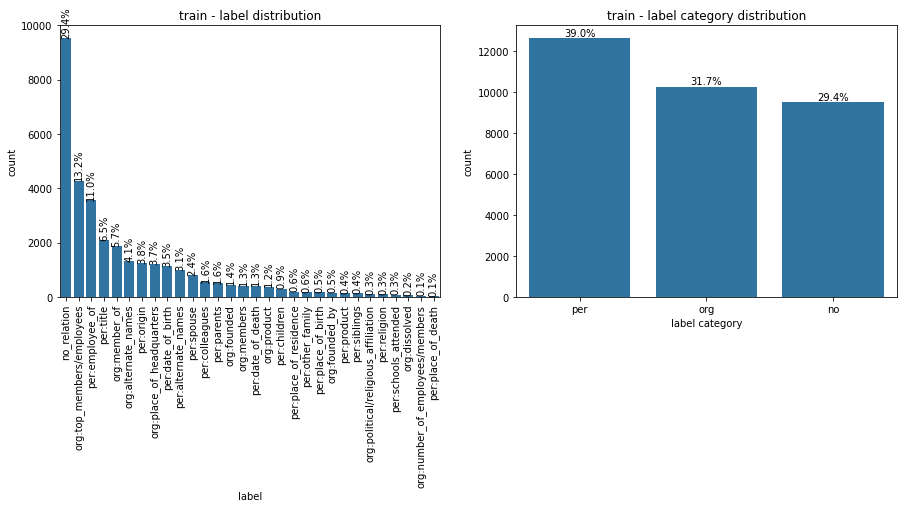

In [11]:
# display(train.groupby(['label'])['label'].count().sort_values())
# print('-'*50)
# print(train['label category'].value_counts())

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=train, x="label", ax=ax[0], order=train['label'].value_counts().index)
sns.countplot(data=train, x="label category", ax=ax[1], order=train['label category'].value_counts().index)

total_train = train.shape[0]
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%',rotation=90)
ax[1].bar_label(ax[1].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%')

ax[0].set_title("train - label distribution")
ax[1].set_title("train - label category distribution")

ax[0].tick_params(axis='x',rotation=90)
plt.show()

### source 분포 확인

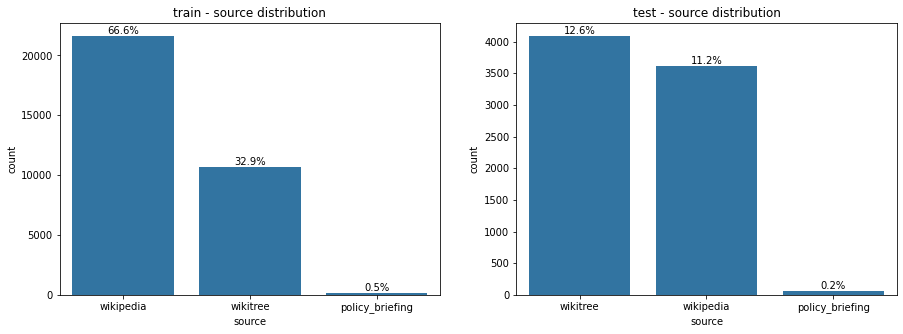

In [12]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=train, x="source", ax=ax[0])
sns.countplot(data=test, x="source", ax=ax[1])

total_train = train.shape[0]
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%')
ax[1].bar_label(ax[1].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.1f}%')

ax[0].set_title("train - source distribution")
ax[1].set_title("test - source distribution")

plt.show()

In [24]:
# 소스별 object type의 분포 확인

### subject와 object 사이 관계

In [13]:
train['consistency'] = train['subject_type']==train['object_type']
train.head()

,sentence,subject_entity,object_entity,label,source,subject_word,subject_start_idx,subject_end_idx,subject_type,object_word,object_start_idx,object_end_idx,object_type,label category,consistency
id,,,,,,,,,,,,,,,
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia,비틀즈,24,26,ORG,조지 해리슨,13,18,PER,no,False
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree,민주평화당,19,23,ORG,대안신당,14,17,ORG,no,True
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree,광주FC,21,24,ORG,한국프로축구연맹,34,41,ORG,org,True
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree,아성다이소,13,17,ORG,박정부,22,24,PER,org,False
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia,요미우리 자이언츠,22,30,ORG,1967,0,3,DAT,no,False


In [14]:
train['consistency'].value_counts()

consistency
False    22361
True     10109
Name: count, dtype: int64

In [15]:
train['subject_type'].unique(), train['object_type'].unique()

(array(['ORG', 'PER'], dtype=object),
 array(['PER', 'ORG', 'DAT', 'LOC', 'POH', 'NOH'], dtype=object))

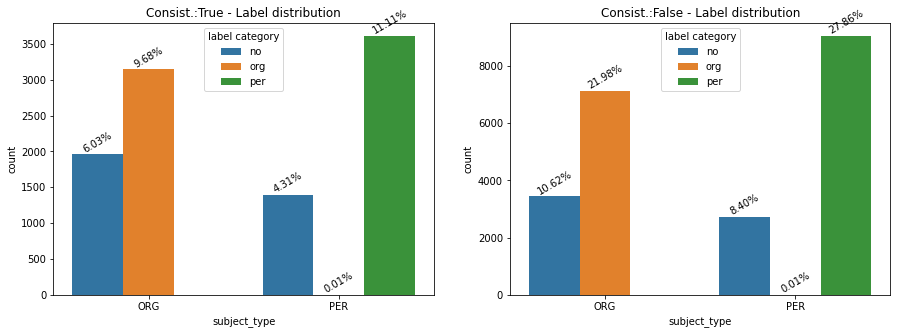

In [16]:
train_true = train[train['consistency']==True]
train_false = train[train['consistency']==False]

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=train_true, x="subject_type", ax=ax[0], hue='label category')
sns.countplot(data=train_false, x="subject_type", ax=ax[1], hue='label category')

total_train = train.shape[0]
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[0].bar_label(ax[0].containers[1], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[0].bar_label(ax[0].containers[2], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[1].bar_label(ax[1].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[1].bar_label(ax[1].containers[1], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[1].bar_label(ax[1].containers[2], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)

ax[0].set_title("Consist.:True - Label distribution")
ax[1].set_title("Consist.:False - Label distribution")

plt.show()

subject type과 object type이 동일할 때, 높은 확률로 subject type과 label이 동일하거나 no relation \
마찬가지로 subject type과 object type이 다를 때도 동일한 양상을 띔. \
**여기서 세울 수 있는 가설1 : subject의 type이 label의 category를 결정함.(동일하거나 no relation)**

#### subject type 별 label category 분포

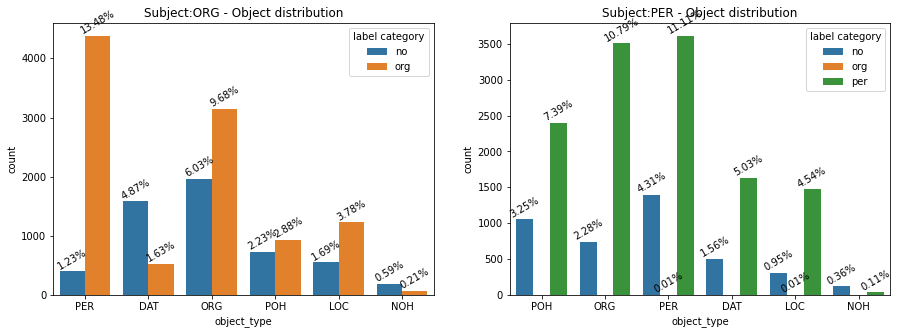

In [17]:
train_org = train[train['subject_type']=='ORG'].sort_values(by='label category')
train_per = train[train['subject_type']!='ORG'].sort_values(by='label category')

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=train_org, x="object_type", ax=ax[0], hue='label category')
sns.countplot(data=train_per, x="object_type", ax=ax[1], hue='label category')

total_train = train.shape[0]
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[0].bar_label(ax[0].containers[1], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[1].bar_label(ax[1].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[1].bar_label(ax[1].containers[1], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[1].bar_label(ax[1].containers[2], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)

ax[0].set_title("Subject:ORG - Object distribution")
ax[1].set_title("Subject:PER - Object distribution")

plt.show()

subject의 type이 org면 label은 org 혹은 no relation \
subject의 type이 per면 label은 높은 확률로 per 아니면 no relation \
가설1과 동일

이진 분류 후 분류

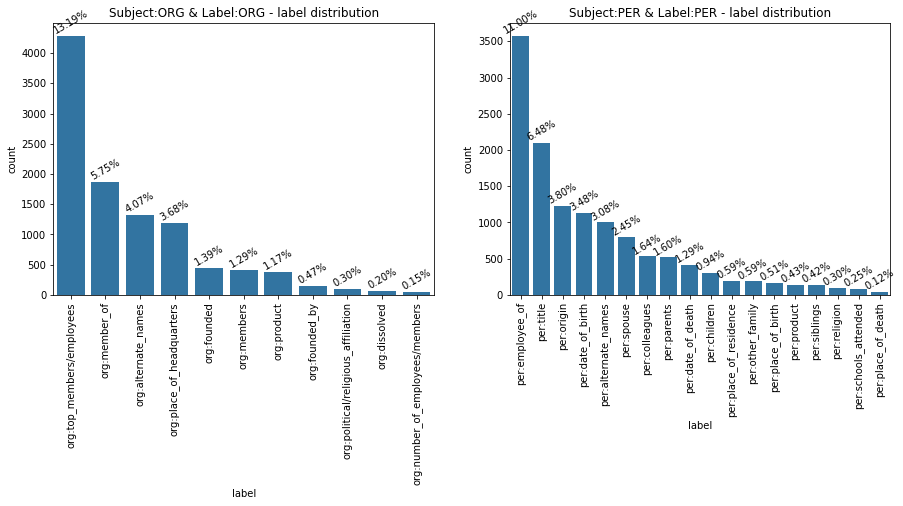

In [18]:
train_org_org = train_org[train_org['label category']=='org']
train_per_per = train_per[train_per['label category']=='per']

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.countplot(data=train_org_org, x="label", ax=ax[0], order=train_org_org['label'].value_counts().index)
sns.countplot(data=train_per_per, x="label", ax=ax[1], order=train_per_per['label'].value_counts().index)

total_train = train.shape[0]
ax[0].bar_label(ax[0].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)
ax[1].bar_label(ax[1].containers[0], fmt=lambda x: f'{(x/total_train)*100:0.2f}%', rotation=30)

ax[0].set_title("Subject:ORG & Label:ORG - label distribution")
ax[1].set_title("Subject:PER & Label:PER - label distribution")

ax[0].tick_params(axis='x',rotation=90)
ax[1].tick_params(axis='x',rotation=90)

plt.show()

### 단어 길이 관계성

In [19]:
train['subject_len'] = train['subject_word'].apply(len)
train['object_len'] = train['object_word'].apply(len)
test['subject_len'] = test['subject_word'].apply(len)
test['object_len'] = test['object_word'].apply(len)

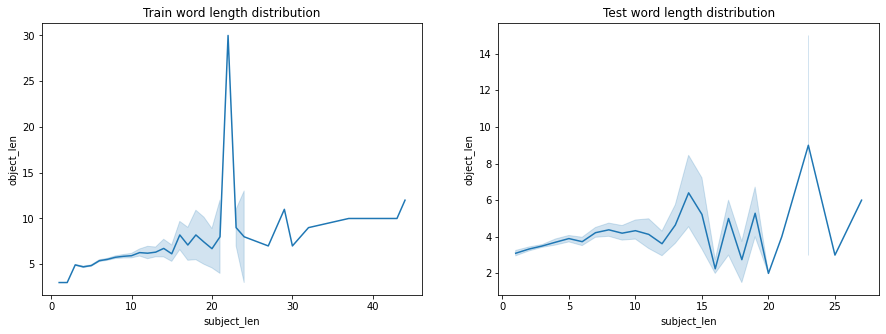

In [20]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.lineplot(data=train, x="subject_len", y="object_len", ax=ax[0])
sns.lineplot(data=test, x="subject_len", y="object_len", ax=ax[1])

ax[0].set_title("Train word length distribution")
ax[1].set_title("Test word length distribution")

plt.show()

<ipython-input-23-762e1ca29c0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_org_org['subject_len'] = train_org_org['subject_word'].apply(len)
<ipython-input-23-762e1ca29c0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_org_org['object_len'] = train_org_org['object_word'].apply(len)
<ipython-input-23-762e1ca29c0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

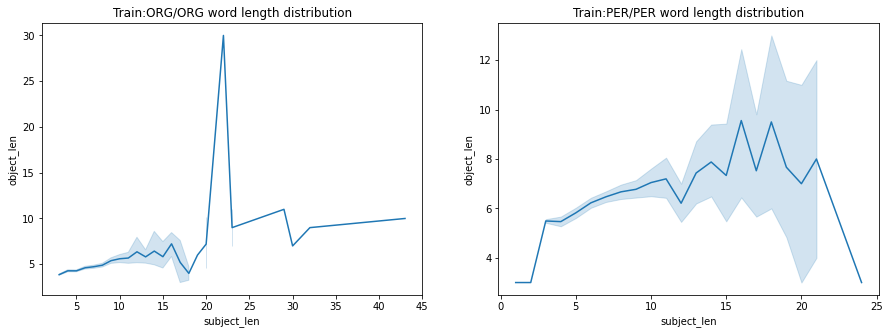

In [23]:
train_org_org['subject_len'] = train_org_org['subject_word'].apply(len)
train_org_org['object_len'] = train_org_org['object_word'].apply(len)
train_per_per['subject_len'] = train_per_per['subject_word'].apply(len)
train_per_per['object_len'] = train_per_per['object_word'].apply(len)

fig, ax = plt.subplots(1,2,figsize=(15,5))

sns.lineplot(data=train_org_org, x="subject_len", y="object_len", ax=ax[0])
sns.lineplot(data=train_per_per, x="subject_len", y="object_len", ax=ax[1])

ax[0].set_title("Train:ORG/ORG word length distribution")
ax[1].set_title("Train:PER/PER word length distribution")

plt.show()